In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
import csv

In [2]:
otm_fp = 'OTM_Main_Database.csv'
otm_data = pd.read_csv(otm_fp, index_col=0)
otm_data['Date'] = pd.to_datetime(otm_data['Date'])

otm_data.head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,OTM_ID,file_name,Lat,Long,Microhabitat,season
0,2022-06-17 23:00:01,C,17.663,2022,6,17,23,0,Canada,OTM8,OTM8_burrow_CAN_2022.csv,50.848904,-110.052497,Burrow,Spring
1,2022-06-18 00:10:01,C,17.663,2022,6,18,0,10,Canada,OTM8,OTM8_burrow_CAN_2022.csv,50.848904,-110.052497,Burrow,Spring
2,2022-06-18 01:20:01,C,17.163,2022,6,18,1,20,Canada,OTM8,OTM8_burrow_CAN_2022.csv,50.848904,-110.052497,Burrow,Spring
3,2022-06-18 02:30:01,C,17.163,2022,6,18,2,30,Canada,OTM8,OTM8_burrow_CAN_2022.csv,50.848904,-110.052497,Burrow,Spring
4,2022-06-18 03:40:01,C,16.662,2022,6,18,3,40,Canada,OTM8,OTM8_burrow_CAN_2022.csv,50.848904,-110.052497,Burrow,Spring


In [5]:
otm_data['Microhabitat'].unique()

array(['Burrow', 'Open', nan, 'Shrub', 'Air_Temperature'], dtype=object)

In [3]:
microhabitat = []
for index, row in otm_data.iterrows():
    if row['OTM_ID']=='Air Temperature':
        micro = 'Air_Temperature'
    else:
        micro = row['Microhabitat']
    microhabitat.append(micro)
otm_data['Microhabitat'] = microhabitat

In [4]:
otm_data['Microhabitat'].unique()

array(['Burrow', 'Air_Temperature', 'Open', nan, 'Shrub'], dtype=object)

In [4]:
#otm_data[otm_data['Study_Site']=='Nebraska']['Microhabitat'].unique()
otm_data[otm_data['Study_Site']=='Nebraska'].head()
otm_data.sort_values(by=['Study_Site', 'OTM_ID','Date']).head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,OTM_ID,file_name,Lat,Long,Microhabitat,season
14304,2022-06-17 23:00:01,C,22.580,2022,6,17,23,0,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
14305,2022-06-18 00:10:01,C,20.579,2022,6,18,0,10,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
14306,2022-06-18 01:20:01,C,21.079,2022,6,18,1,20,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
14307,2022-06-18 02:30:01,C,19.077,2022,6,18,2,30,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
14308,2022-06-18 03:40:01,C,18.077,2022,6,18,3,40,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring


In [4]:
otm_data['Study_Site'].unique()

array(['Canada', 'Texas-Monohans', 'Texas-Marathon', 'Nebraska'],
      dtype=object)

In [4]:
snake_fp = 'snake_thermal_database.csv'
snake_data = pd.read_csv(snake_fp, index_col=0)
snake_data['Date'] = pd.to_datetime(snake_data['Date'])
snake_data=snake_data[snake_data["Snake_Name"] != 'Dusty']
#snake_data['rolling_temp_mean'] = snake_data.groupby('Snake_Name')['Temperature'].apply(lambda x : x.rolling(3).mean())
#snake_data['rolling_temp_std'] = snake_data.groupby('Snake_Name')['Temperature'].apply(lambda x : x.rolling(3).std())
snake_data.sort_values(by=['Study_Site', 'Snake_Name','Date']).head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,Snake_Name,file_name,season
81399,2022-07-07 23:00:01,C,25.053,2022,7,7,23,0,Canada,Albert,Albert_(EDCRVI003)2022_2023.csv,Summer
81400,2022-07-08 00:10:01,C,25.053,2022,7,8,0,10,Canada,Albert,Albert_(EDCRVI003)2022_2023.csv,Summer
81401,2022-07-08 01:20:01,C,25.053,2022,7,8,1,20,Canada,Albert,Albert_(EDCRVI003)2022_2023.csv,Summer
81402,2022-07-08 02:30:01,C,24.553,2022,7,8,2,30,Canada,Albert,Albert_(EDCRVI003)2022_2023.csv,Summer
81403,2022-07-08 03:40:01,C,24.553,2022,7,8,3,40,Canada,Albert,Albert_(EDCRVI003)2022_2023.csv,Summer


In [7]:
# def season_of_date(date):
#     year = str(date.year)

#     # Extract a string of only the date of the DateTime column, use that in the if statements.
#     date_only = str(date.date())

#     # Changed the format of the date_range from DD-MM-YYYY to YYYY-MM-DD.
#     seasons = {'Spring': pd.date_range(start=year+'/03/21', end=year+'/06/20'),
#                'Summer': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
#                'Autumn': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
#     if date_only in seasons['Spring']:
#         return 'Spring'
#     if date_only in seasons['Summer']:
#         return 'Summer'
#     if date_only in seasons['Autumn']:
#         return 'Autumn'
#     else:
#         return 'Winter'
    
    
# otm_data['season'] = [season_of_date(row['Date']) for index, row in otm_data.iterrows()]    
# #airtemp_df['season'] = [season_of_date(row['Date']) for index, row in airtemp_df.iterrows()]
# snake_data['season'] = [season_of_date(row['Date']) for index, row in snake_data.iterrows()]  

#### Metrics and Stats to Pursue
 - Airtemp Time Series
 - Snake Temp Time Series
 - Mean Snake temp by Study Site
 - Min, Max Nightly Air Temperatures
 - Min, Max Day Air Temps
 - Temps by microhabitat type

In [11]:
#### Air Temp
airtemp_df = otm_data[otm_data['OTM_ID'] == 'Air Temperature']
airtemp_df = airtemp_df.reset_index()
airtemp_df['Study_Site'].unique()
airtemp_df.head()

,index,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,OTM_ID,file_name,Lat,Long,Microhabitat,season
0,14304,2022-06-17 23:00:01,C,22.580,2022,6,17,23,0,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
1,14305,2022-06-18 00:10:01,C,20.579,2022,6,18,0,10,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
2,14306,2022-06-18 01:20:01,C,21.079,2022,6,18,1,20,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
3,14307,2022-06-18 02:30:01,C,19.077,2022,6,18,2,30,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring
4,14308,2022-06-18 03:40:01,C,18.077,2022,6,18,3,40,Canada,Air Temperature,Air_Temp_CAN_2022.csv,50.849182,-110.051823,Open,Spring


In [7]:
airtemp_df[airtemp_df['Study_Site']=='Texas-Marathon']

,index,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,OTM_ID,file_name,Lat,Long,Microhabitat,season


[Text(0, 0.5, 'Air Temp (C)'), Text(0.5, 1.0, 'Air Temperature')]

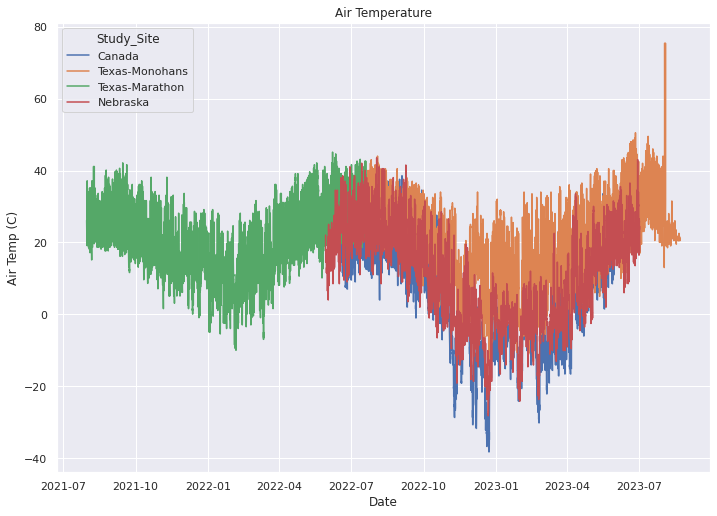

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=airtemp_df, x = "Date",y = "Temperature", hue = "Study_Site").set(ylabel = "Air Temp (C)",
                                                                                   title = 'Air Temperature')

[Text(0, 0.5, 'Air Temp (C)'), Text(0.5, 1.0, 'Air Temperature')]

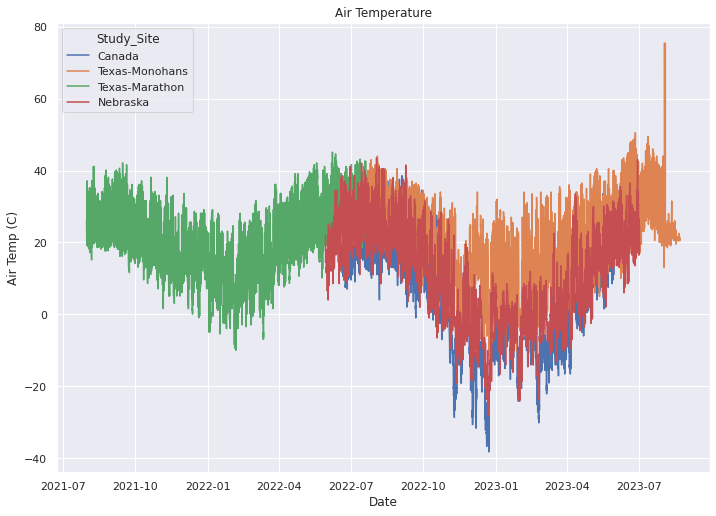

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=airtemp_df, x = "Date",y = "Temperature", hue = "Study_Site").set(ylabel = "Air Temp (C)",
                                                                                   title = 'Air Temperature')

In [7]:
study_site_centroids = otm_data.groupby("Study_Site")[["Lat", "Long"]].agg('mean')
study_site_centroids.head()

,Lat,Long
Study_Site,,
Canada,50.849098,-110.052218
Nebraska,42.798095,-100.127973
Texas-Marathon,30.321304,-103.135531
Texas-Monohans,NaN,NaN


[Text(0, 0.5, 'Snake Temp (C)'), Text(0.5, 1.0, 'Snake Temp')]

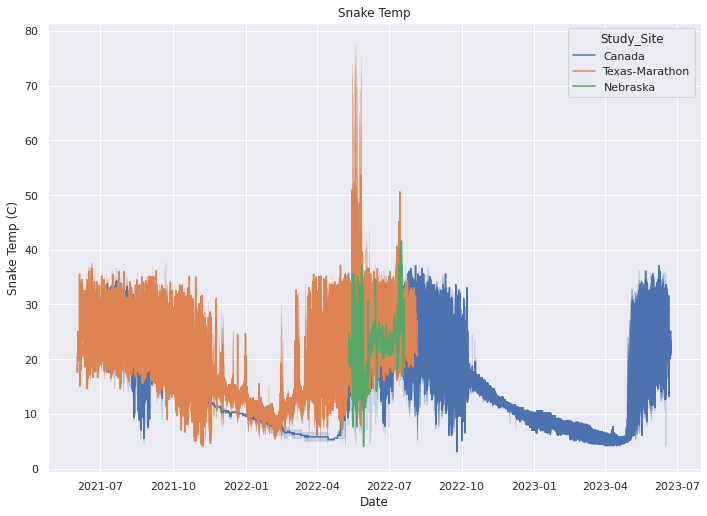

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=snake_data, x = "Date",y = "Temperature", hue = "Study_Site").set(ylabel = "Snake Temp (C)",
                                                                                    title = 'Snake Temp')

In [24]:
snake_data['Study_Site'].unique()

array(['Canada', 'Nebraska'], dtype=object)

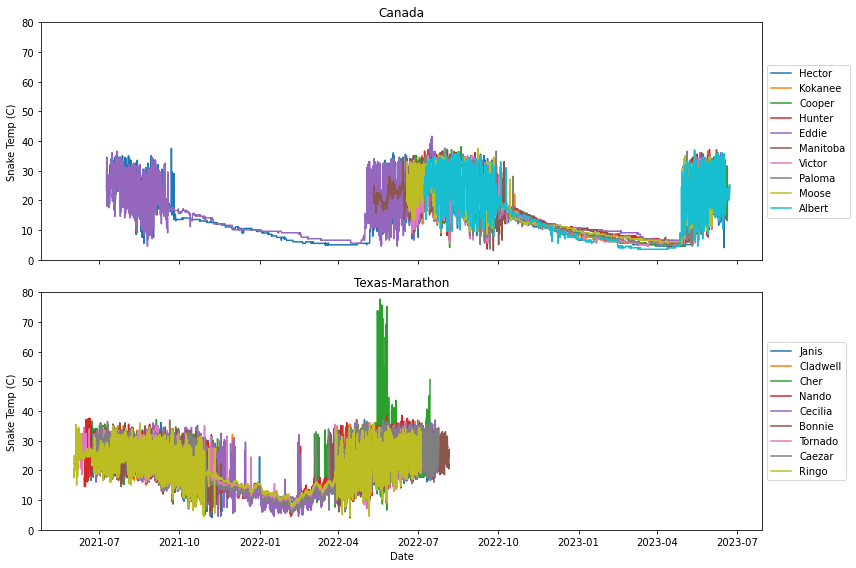

In [23]:
fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))

p = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Canada'],
                 x = "Date",y = "Temperature", hue = "Snake_Name", ax=axs[0]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Canada', ylim=(0,80))
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1 = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "Temperature", hue = "Snake_Name", ax=axs[1]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Texas-Marathon',
                                                                       ylim=(0,80))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

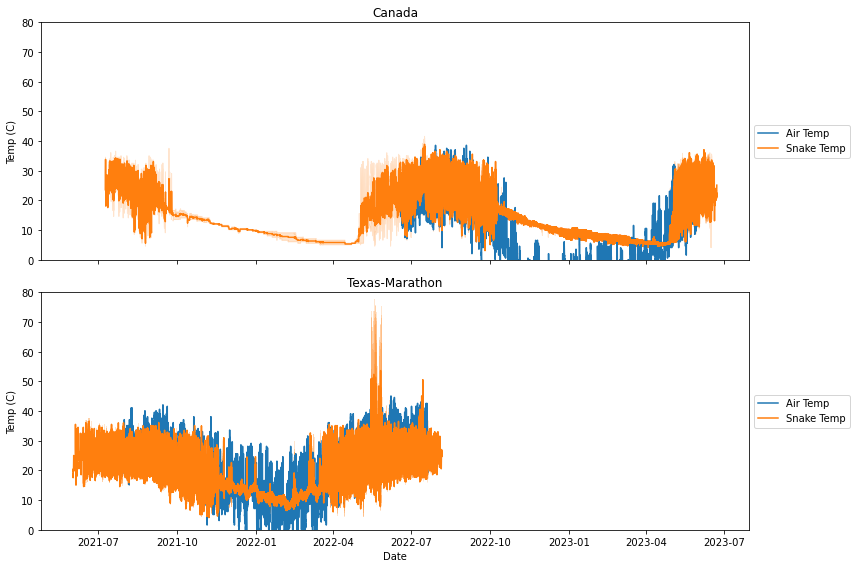

In [24]:
fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))
p_air = sns.lineplot(data=airtemp_df[airtemp_df['Study_Site'] == 'Canada'],
                     x = "Date",y = "Temperature", ax=axs[0], label = 'Air Temp')
p = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Canada'],
                 x = "Date",y = "Temperature", ax=axs[0], label = 'Snake Temp').set(ylabel = "Temp (C)",
                                                                       title = 'Canada', ylim=(0,80))


axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p_air1 = sns.lineplot(data=airtemp_df[airtemp_df['Study_Site'] == 'Texas-Marathon'],
                     x = "Date",y = "Temperature", ax=axs[1], label = 'Air Temp')
p1 = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "Temperature", ax=axs[1], label = 'Snake Temp').set(ylabel = "Temp (C)",
                                                                       title = 'Texas-Marathon',
                                                                       ylim=(0,80))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

In [26]:
## Make General Timeline 
study_site_centroids = [['Canada', 50.849098,-110.052218],
                        ['Texas-Marathon',30.321304, -103.135531]]
               

In [9]:
snake_data.head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,Snake_Name,file_name,season
0,2022-07-07 23:00:01,C,25.107,2022,7,7,23,0,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
1,2022-07-08 00:10:01,C,25.107,2022,7,8,0,10,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
2,2022-07-08 01:20:01,C,24.607,2022,7,8,1,20,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
3,2022-07-08 02:30:01,C,24.107,2022,7,8,2,30,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
4,2022-07-08 03:40:01,C,24.607,2022,7,8,3,40,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer


In [12]:
#snake_data['rolling_temp_mean'] = snake_data.groupby('Snake_Name')['Temperature'].apply(lambda x : x.rolling(5).mean())
#snake_data['rolling_temp_std'] = snake_data.groupby('Snake_Name')['Temperature'].apply(lambda x : x.rolling(5).std())
snake_data.head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,Snake_Name,file_name,season
0,2022-07-07 23:00:01,C,25.107,2022,7,7,23,0,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
1,2022-07-08 00:10:01,C,25.107,2022,7,8,0,10,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
2,2022-07-08 01:20:01,C,24.607,2022,7,8,1,20,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
3,2022-07-08 02:30:01,C,24.107,2022,7,8,2,30,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer
4,2022-07-08 03:40:01,C,24.607,2022,7,8,3,40,Canada,Hector,Hector_(EDCRVI002)2022_2023.csv,Summer


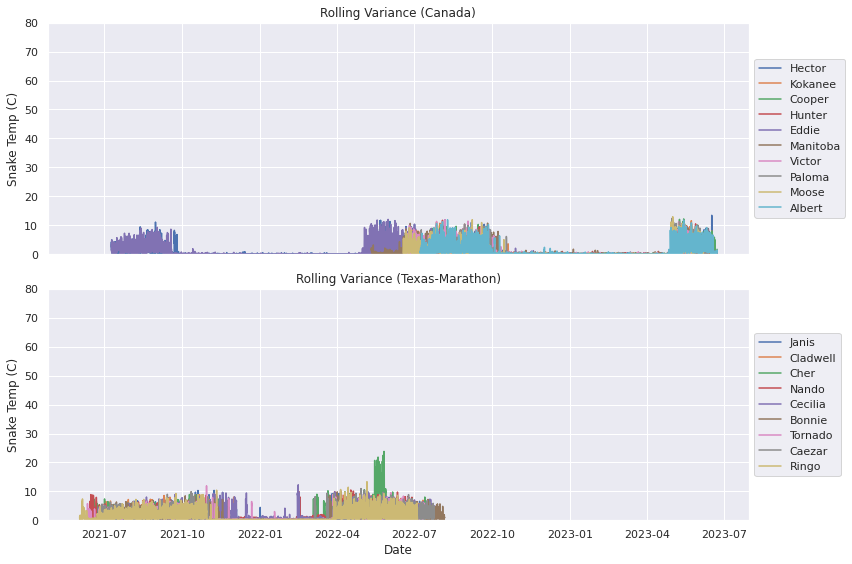

In [10]:
fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))

p = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Canada'],
                 x = "Date",y = "rolling_temp_std", hue = "Snake_Name", ax=axs[0]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Rolling Variance (Canada)', ylim=(0,80))
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1 = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "rolling_temp_std", hue = "Snake_Name", ax=axs[1]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Rolling Variance (Texas-Marathon)',
                                                                       ylim=(0,80))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

No handles with labels found to put in legend.


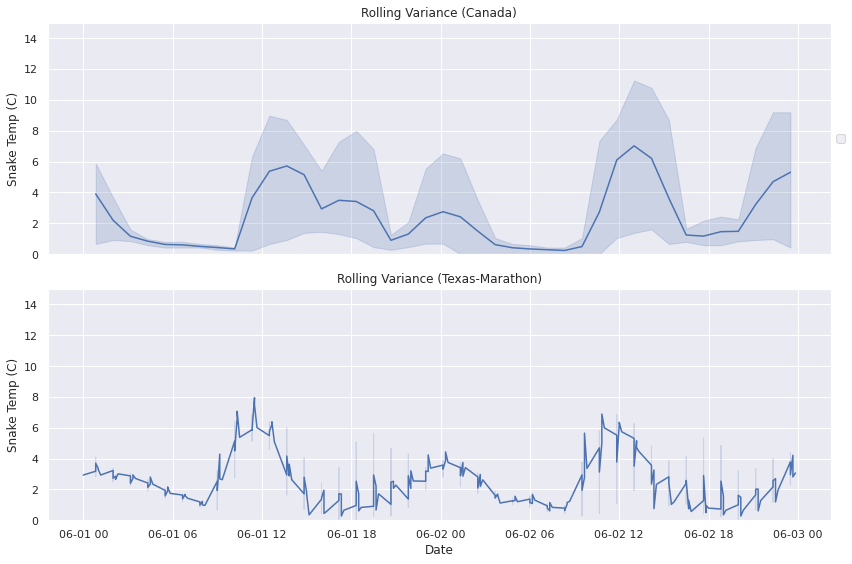

In [11]:
## Filter date variance
temp_snake = snake_data.loc[(snake_data['Date'] >= '2022-06-01') & (snake_data['Date'] <= '2022-06-03')]

fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))

p = sns.lineplot(data=temp_snake[temp_snake["Study_Site"] == 'Canada'],
                 x = "Date",y = "rolling_temp_std", ax=axs[0]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Rolling Variance (Canada)', ylim=(0,15))
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1 = sns.lineplot(data=temp_snake[temp_snake["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "rolling_temp_std", ax=axs[1]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Rolling Variance (Texas-Marathon)',
                                                                       ylim=(0,15))
#axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

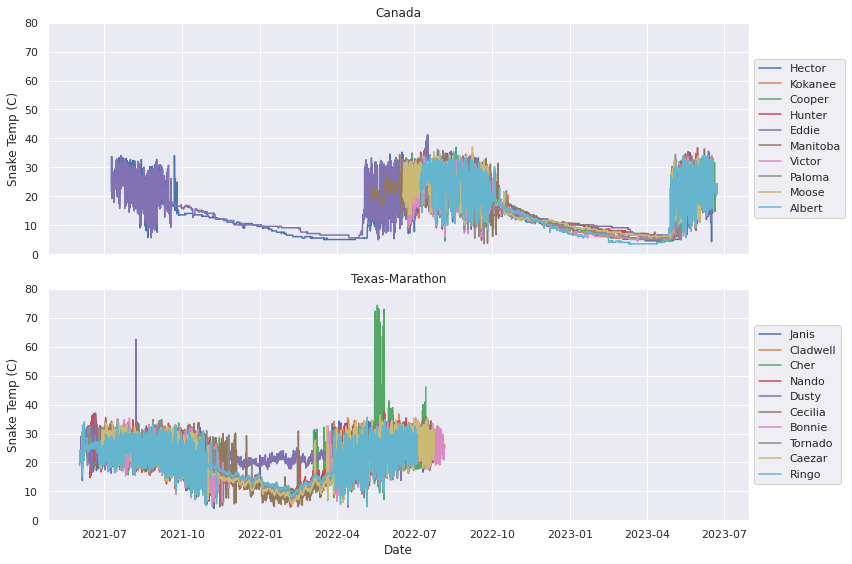

In [12]:
fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))

p = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Canada'],
                 x = "Date",y = "rolling_temp_mean", hue = "Snake_Name", ax=axs[0]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Canada', ylim=(0,80))
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1 = sns.lineplot(data=snake_data[snake_data["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "rolling_temp_mean", hue = "Snake_Name", ax=axs[1]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Texas-Marathon',
                                                                       ylim=(0,80))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

No handles with labels found to put in legend.


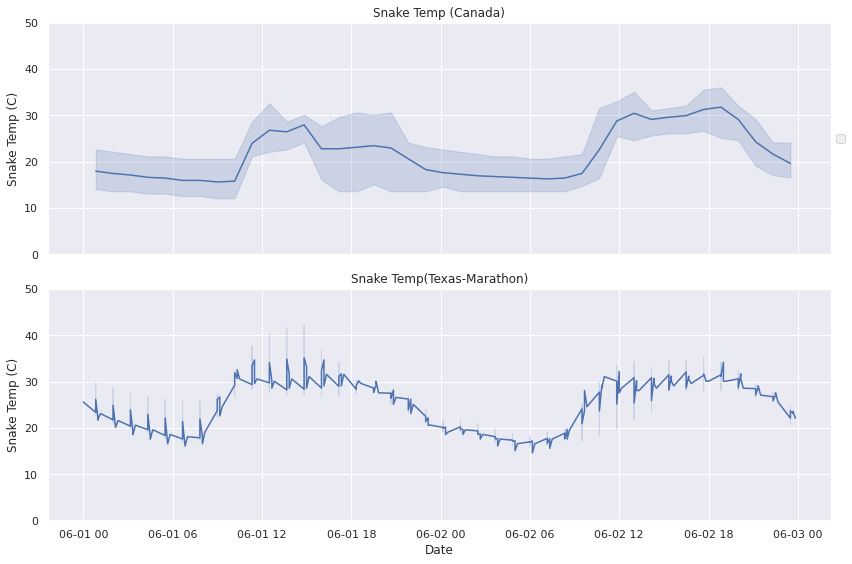

In [10]:
## Filter date Temperature
temp_snake = snake_data.loc[(snake_data['Date'] >= '2022-06-01') & (snake_data['Date'] <= '2022-06-03')]

fig, axs = plt.subplots(2,1, sharex=True,sharey=False, figsize=(12,8))

p = sns.lineplot(data=temp_snake[temp_snake["Study_Site"] == 'Canada'],
                 x = "Date",y = "Temperature", ax=axs[0]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Snake Temp (Canada)', ylim=(0,50))
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1 = sns.lineplot(data=temp_snake[temp_snake["Study_Site"] == 'Texas-Marathon'],
                 x = "Date",y = "Temperature", ax=axs[1]).set(ylabel = "Snake Temp (C)",
                                                                       title = 'Snake Temp(Texas-Marathon)',
                                                                       ylim=(0,50))
#axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

In [ ]:
sns.set_theme()
g = sns.FacetGrid(airtemp_df, col="Study_Site",  row="season")
g.map(sns.lineplot, "hour", "Temperature")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

In [8]:
agg_snake = snake_data.groupby(['Study_Site',
                                'season',
                                'hour']).agg({'Temperature': ['min', 'max', 'mean', 'std'],
                                              'rolling_temp_std': ['min', 'max', 'mean', 'std']}).copy().reset_index()
columns = ['Study_Site', 'Season', 'Hour',
           'temp_min', 'temp_max', 'temp_mean', 'temp_std',
           'rollstd_min', 'rollstd_max', 'rollstd_mean', 'rollstd_std']
agg_snake.columns = columns
agg_snake.head()

KeyError: "Column(s) ['rolling_temp_std'] do not exist"

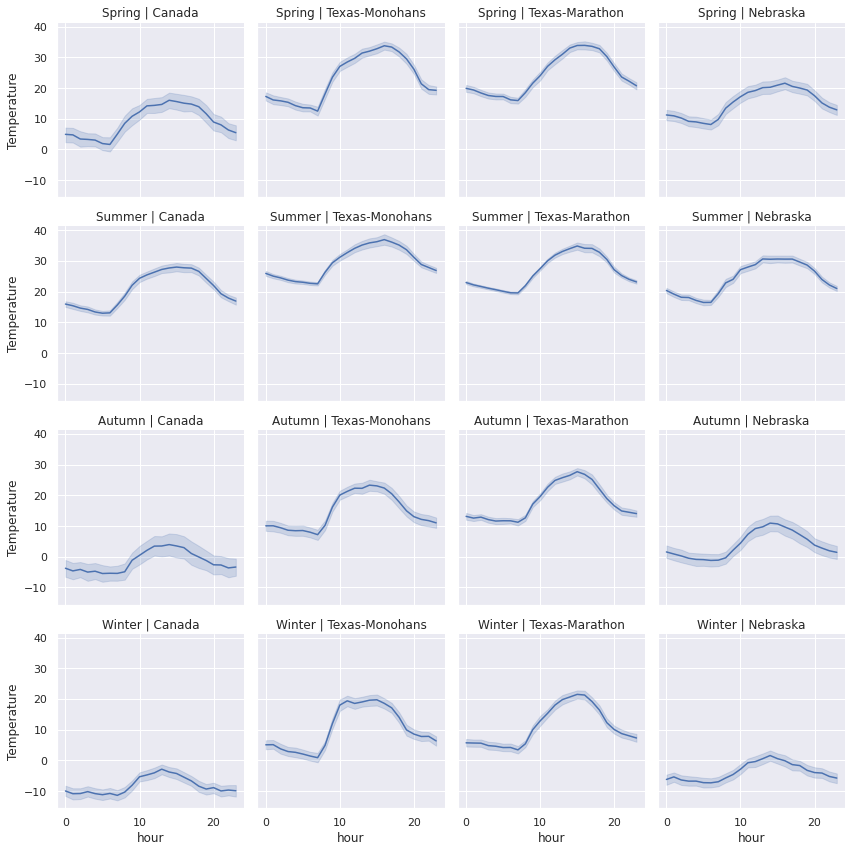

In [13]:
sns.set_theme()
g = sns.FacetGrid(airtemp_df, col="Study_Site",  row="season")
g.map(sns.lineplot, "hour", "Temperature")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

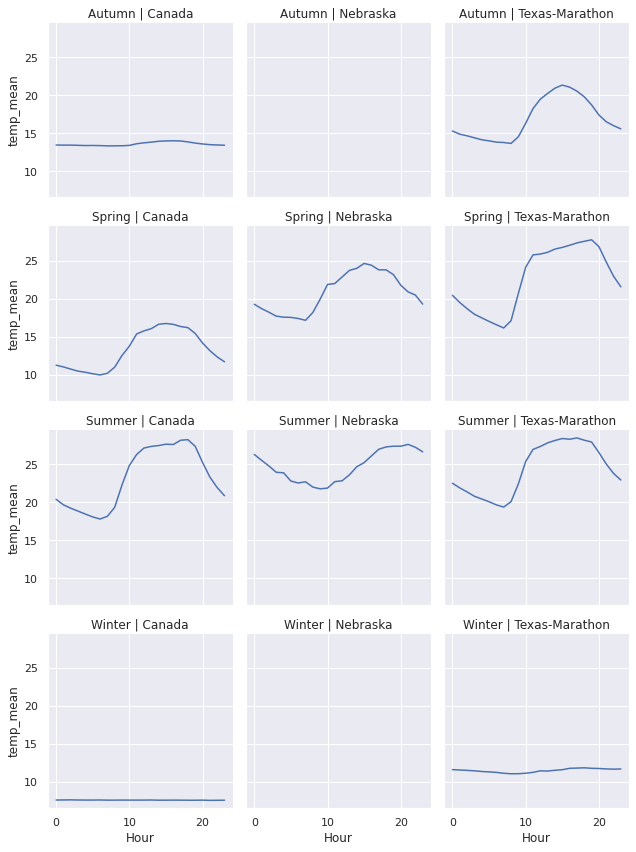

In [14]:
# Rolling standard deviation Mean
g = sns.FacetGrid(agg_snake, col="Study_Site",  row="Season")
g.map(sns.lineplot, "Hour", "temp_mean")
#g.map(sns.lineplot, "Hour", "rollstd_mean")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

In [ ]:
## Plot grid by burrow type
g = sns.FacetGrid(otm_data, col="Microhabitat",  row="Study_Site", hue = 'season')
g.map(sns.lineplot, "hour", "Temperature")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.legend()
g.tight_layout()

In [24]:
#####################
## k-means cluster alg
#####################
#airtemp_df.head()
at = airtemp_df[['Study_Site','year', 'month', 'day','minute','Temperature']].copy()
at.columns = ['Study_Site','year', 'month', 'day','minute','Air Temperature']
at[at['Study_Site']=='Texas-Marathon']['month'].unique()


array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [5]:
cd = otm_data.pivot_table(index=['Study_Site', 'year', 'month', 'day','hour'],
                          columns='Microhabitat',
                          values='Temperature').reset_index()
cd = cd.reset_index()
cd['date'] = pd.to_datetime(cd[['year', 'month', 'day', 'hour']])
cd = cd[['Study_Site', 'date', 'Air_Temperature', 'Burrow', 'Open']]
cd.columns = ['Study_Site', 'date', 'Air_Temperature', 'Burrow', 'Open']
# main_data = otm_main.merge(meta_data, on=['Study_Site', 'OTM_ID'], how='left')
#cd = at.merge(cd,on=['Study_Site', 'year', 'month', 'day', 'minute'], how='left')
cd['year'] = cd['date'].dt.year
cd['month'] = cd['date'].dt.month
cd['day'] = cd['date'].dt.day
cd['hour'] = cd['date'].dt.hour
cd['minute'] = cd['date'].dt.minute
cd.head()

,Study_Site,date,Air_Temperature,Burrow,Open,year,month,day,hour,minute
0,Canada,2022-06-17 23:00:00,22.580,18.48650,21.1220,2022,6,17,23,0
1,Canada,2022-06-18 00:00:00,20.579,17.86075,18.3690,2022,6,18,0,0
2,Canada,2022-06-18 01:00:00,21.079,17.73575,19.1205,2022,6,18,1,0
3,Canada,2022-06-18 02:00:00,19.077,16.85950,16.3660,2022,6,18,2,0
4,Canada,2022-06-18 03:00:00,18.077,16.48375,15.3645,2022,6,18,3,0


In [23]:
cd['Study_Site'].unique()

array(['Canada', 'Nebraska', 'Texas-Marathon', 'Texas-Monohans'],
      dtype=object)

In [6]:
# Create a new column called 'NewColumn'
cd['ssid'] = 0  # Initialize the new column with zeros

# Update values based on conditions
cd.loc[cd['Study_Site'] == 'Canada', 'ssid'] = 1
cd.loc[cd['Study_Site'] == 'Nebraska', 'ssid'] = 2
cd.loc[cd['Study_Site'] == 'Texas-Marathon', 'ssid'] = 3
cd.loc[cd['Study_Site'] == 'Texas-Monohans', 'ssid'] = 4
cd['merge_id'] = cd['ssid'].astype(str) + cd['year'].astype(str) + cd['month'].astype(str)+ cd['day'].astype(str) + cd['hour'].astype(str)
cd['merge_id'] = cd['merge_id'].astype(int)

In [14]:
july = cd[cd['month']==7]
july[july['day']==8].head()

,Study_Site,date,Air_Temperature,Burrow,Open,year,month,day,hour,minute
413,Canada,2022-07-08 00:00:00,19.077,18.73725,18.1190,2022,7,8,0,0
414,Canada,2022-07-08 02:00:00,18.077,18.61225,17.3680,2022,7,8,2,0
415,Canada,2022-07-08 03:00:00,16.575,17.86150,15.8650,2022,7,8,3,0
416,Canada,2022-07-08 04:00:00,15.574,16.98475,14.8630,2022,7,8,4,0
417,Canada,2022-07-08 05:00:00,15.574,17.23525,15.3645,2022,7,8,5,0


In [60]:
# fig, axs = plt.subplots(1,1, sharex=True,sharey=False, figsize=(12,8))

# p = sns.lineplot(data=cd[cd['Study_Site']=='Texas-Marathon'],
#                  x = "Date",y = "Air Temperature", ax=axs, label='Air').set(ylabel = "Temp (C)",
#                                                                        title = 'Marathon')
# p2 = sns.lineplot(data=cd[cd['Study_Site']=='Texas-Marathon'],
#                  x = "Date",y = "Burrow", ax=axs, label='Burrow').set(ylabel = "Temp (C)",
#                                                                        title = 'Marathon')
# # p3 = sns.lineplot(data=cd[cd['Study_Site']=='Texas-Marathon'],
# #                  x = "Date",y = "Shrub", ax=axs, label='Shrub').set(ylabel = "Temp (C)",
# #                                                                        title = 'Marathon')
# axs.legend()

In [22]:
# snake_temp = 
# burrow_temp = cd[cd['Microhabitat']=='Burrow']
# air_temp = cd[cd['Microhabitat']=='Air Temperature']
cd_snake = snake_data.copy()
cd_snake = cd_snake[['Snake_Name', 'Study_Site', 'year', 'month', 'day', 'hour', 'Temperature']]
cd_snake['date'] = pd.to_datetime(cd_snake[['year', 'month', 'day', 'hour']])
cd_snake = cd_snake[['Snake_Name', 'Study_Site', 'date', 'Temperature']]
cd_snake['year'] = cd_snake['date'].dt.year
cd_snake['month'] = cd_snake['date'].dt.month
cd_snake['day'] = cd_snake['date'].dt.day
cd_snake['hour'] = cd_snake['date'].dt.hour
cd_snake['minute'] = cd_snake['date'].dt.minute
# Create a new column called 'NewColumn'
cd_snake['ssid'] = 0  # Initialize the new column with zeros

# Update values based on conditions
cd_snake.loc[cd_snake['Study_Site'] == 'Canada', 'ssid'] = 1
cd_snake.loc[cd_snake['Study_Site'] == 'Nebraska', 'ssid'] = 2
cd_snake.loc[cd_snake['Study_Site'] == 'Texas-Marathon', 'ssid'] = 3
cd_snake.loc[cd_snake['Study_Site'] == 'Texas-Monohans', 'ssid'] = 4
cd_snake['merge_id'] = cd_snake['ssid'].astype(str) + cd_snake['year'].astype(str) + cd_snake['month'].astype(str)+ cd_snake['day'].astype(str) + cd_snake['hour'].astype(str)
cd_snake['merge_id'] = cd_snake['merge_id'].astype(int)
cd_snake.head()
#cd_snake['Temp_deriv'] = cd_snake.groupby(['Study_Site', 'Snake_Name'])['Temperature'].diff()
#cd_snake['Temp_2_deriv'] = cd_snake.groupby(['Study_Site', 'Snake_Name'])['Temp_deriv'].diff()

,Snake_Name,Study_Site,date,Temperature,year,month,day,hour,minute,ssid,merge_id
0,Hector,Canada,2022-07-07 23:00:00,25.107,2022,7,7,23,0,1,120227723
1,Hector,Canada,2022-07-08 00:00:00,25.107,2022,7,8,0,0,1,12022780
2,Hector,Canada,2022-07-08 01:00:00,24.607,2022,7,8,1,0,1,12022781
3,Hector,Canada,2022-07-08 02:00:00,24.107,2022,7,8,2,0,1,12022782
4,Hector,Canada,2022-07-08 03:00:00,24.607,2022,7,8,3,0,1,12022783


In [9]:
len(cd_snake)

162976

In [10]:
len(cd)

31721

In [23]:
cd_snake_env = pd.merge(cd_snake, cd, on=['merge_id'], how='left')

In [24]:
cd_snake_env = cd_snake_env[['Snake_Name','Study_Site_x','date_x',
                    'Temperature',
                    'year_x','month_x', 'day_x','hour_x',
                    'ssid_x',
                    'Air_Temperature', 'Burrow', 'Open']]


cd_snake_env.columns = ['Snake_Name',
                    'Study_Site',
                    'date',
                    'Temperature',
                    'year','month', 'day','hour',
                    'ssid',
                    'Air_Temperature', 'Burrow', 'Open']

In [25]:
cd_snake_env.head()

,Snake_Name,Study_Site,date,Temperature,year,month,day,hour,ssid,Air_Temperature,Burrow,Open
0,Hector,Canada,2022-07-07 23:00:00,25.107,2022,7,7,23,1,19.077,18.73725,17.368
1,Hector,Canada,2022-07-08 00:00:00,25.107,2022,7,8,0,1,19.077,18.73725,18.119
2,Hector,Canada,2022-07-08 01:00:00,24.607,2022,7,8,1,1,NaN,NaN,NaN
3,Hector,Canada,2022-07-08 02:00:00,24.107,2022,7,8,2,1,18.077,18.61225,17.368
4,Hector,Canada,2022-07-08 03:00:00,24.607,2022,7,8,3,1,16.575,17.86150,15.865


In [14]:
len(cd_snake)

162976

In [16]:
missing_values_count = cd_snake_env.isna().sum()
print(missing_values_count)

Snake_Name             0
Study_Site             0
date                   0
Temperature            0
year                   0
month                  0
day                    0
hour                   0
ssid                   0
Air_Temperature    35629
Burrow             35614
Open               35614
dtype: int64


In [26]:
rows_with_missing_data = cd_snake_env[cd_snake_env.isnull().any(axis=1)]
rows_with_missing_data.head()
#rows_with_missing_data['Study_Site'].unique()

,Snake_Name,Study_Site,date,Temperature,year,month,day,hour,ssid,Air_Temperature,Burrow,Open
2,Hector,Canada,2022-07-08 01:00:00,24.607,2022,7,8,1,1,NaN,NaN,NaN
8,Hector,Canada,2022-07-08 08:00:00,22.107,2022,7,8,8,1,NaN,NaN,NaN
14,Hector,Canada,2022-07-08 15:00:00,25.107,2022,7,8,15,1,NaN,NaN,NaN
20,Hector,Canada,2022-07-08 22:00:00,25.607,2022,7,8,22,1,NaN,NaN,NaN
26,Hector,Canada,2022-07-09 05:00:00,21.106,2022,7,9,5,1,NaN,NaN,NaN


In [27]:
rows_with_missing_data.groupby('Study_Site').size()

Study_Site
Canada            23638
Nebraska            377
Texas-Marathon    11617
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer, KNNImputer


# Specify columns for which you want to perform imputation
columns_to_impute = ['Air_Temperature', 'Burrow', 'Open']

# Imputing missing values using a rolling mean for specified columns
rolling_mean_window = 3

# imputer = SimpleImputer(strategy='mean')

# # Define a function for group-wise rolling mean imputation
def group_rolling_mean_imputation(group_df):
    group_df[columns_to_impute] = group_df[columns_to_impute].rolling(window=rolling_mean_window, min_periods=1).mean()
    return group_df
# Define a function for group-wise KNN imputation
def group_knn_imputation(group_df):
    imputer = KNNImputer(n_neighbors=3)
    group_df[columns_to_impute] = imputer.fit_transform(group_df[columns_to_impute])
    return group_df

# Apply group-wise KNN imputation using groupby and apply
cd_snake_imputed = cd_snake_env.groupby('Snake_Name').apply(group_rolling_mean_imputation)
# Apply group-wise rolling mean imputation using groupby and apply
#cd_snake_imputed = cd_snake.groupby('Snake_Name').apply(group_rolling_mean_imputation)
cd_snake_imputed.reset_index(drop=True, inplace=True)
# Linear interpolation within each group
# Linear interpolation within each group
for column in columns_to_impute:
    cd_snake_imputed[column] = cd_snake_imputed.groupby('Snake_Name')[column].transform(lambda x: x.interpolate(method='linear'))



In [33]:
missing_values_count = cd_snake_imputed.isna().sum()
print(missing_values_count)

Snake_Name            0
Study_Site            0
date                  0
Temperature           0
year                  0
month                 0
day                   0
hour                  0
ssid                  0
Air_Temperature    4234
Burrow             4232
Open               4232
dtype: int64


In [34]:
rows_with_missing_data = cd_snake_imputed[cd_snake_imputed.isnull().any(axis=1)]
rows_with_missing_data.head()

,Snake_Name,Study_Site,date,Temperature,year,month,day,hour,ssid,Air_Temperature,Burrow,Open
7620,Bjorn,Nebraska,2022-05-11 12:00:00,23.642,2022,5,11,12,2,NaN,NaN,NaN
7621,Bjorn,Nebraska,2022-05-11 13:00:00,20.138,2022,5,11,13,2,NaN,NaN,NaN
7622,Bjorn,Nebraska,2022-05-11 14:00:00,19.137,2022,5,11,14,2,NaN,NaN,NaN
7623,Bjorn,Nebraska,2022-05-11 16:00:00,21.640,2022,5,11,16,2,NaN,NaN,NaN
7624,Bjorn,Nebraska,2022-05-11 17:00:00,22.141,2022,5,11,17,2,NaN,NaN,NaN


In [35]:
rows_with_missing_data.groupby('Study_Site').size()

Study_Site
Canada             451
Nebraska           377
Texas-Marathon    3406
dtype: int64

In [36]:
cd_snake_imputed.to_csv('snake_and_at_data.csv') 

In [15]:
#snakes = list(cd_snake['Snake_Name'].unique())
cd_snake.head(15)

,Snake_Name,Study_Site,date,Temperature,Air_Temperature,Burrow,Open
0,Hector,Canada,2022-07-07 23:00:00,25.107,19.077,18.73725,17.3680
1,Hector,Canada,2022-07-08 00:00:00,25.107,19.077,18.73725,18.1190
2,Hector,Canada,2022-07-08 01:00:00,24.607,NaN,NaN,NaN
3,Hector,Canada,2022-07-08 02:00:00,24.107,18.077,18.61225,17.3680
4,Hector,Canada,2022-07-08 03:00:00,24.607,16.575,17.86150,15.8650
5,Hector,Canada,2022-07-08 04:00:00,22.607,15.574,16.98475,14.8630
6,Hector,Canada,2022-07-08 06:00:00,22.107,17.576,17.73625,17.1175
7,Hector,Canada,2022-07-08 07:00:00,21.607,21.579,19.23800,22.3730
8,Hector,Canada,2022-07-08 08:00:00,22.107,NaN,NaN,NaN
9,Hector,Canada,2022-07-08 09:00:00,21.106,24.580,21.11400,33.6165


In [37]:
### K Means Cluster Analysis (Temp) ####
from sklearn.cluster import KMeans
study_sites = ['Canada', 'Texas-Marathon', 'Nebraska']
seasons = ['Summer', 'Autumn', 'Winter', 'Spring']

num_clusters = 2
iterations = 1000

burrow_df = pd.DataFrame()
#for site in study_sites:
for snake in snakes:
    #for season in seasons:
    condition1 = cd_snake['Snake_Name']==snake
    #condition2 = cd_snake['season']==season

    #temp_df = cd_snake.loc[condition1 & condition2].dropna()
    temp_df = cd_snake.loc[condition1].dropna()
    if len(temp_df)>0:
        kmeans = KMeans(
                init="random",
                n_clusters=num_clusters,
                n_init=10,
                max_iter=iterations,
                random_state=42
        )
        #x = cd_snake[['Temperature']].dropna()
        x = temp_df[['Temperature','rolling_temp_std','Temp_2_deriv']] #'Burrow', 'Air Temperature',
        kmeans.fit(x)
        temp_df['kmean_clusters']=kmeans.labels_
        burrow_df = burrow_df.append(temp_df)

NameError: name 'snakes' is not defined

In [29]:
burrow_df.head()

""


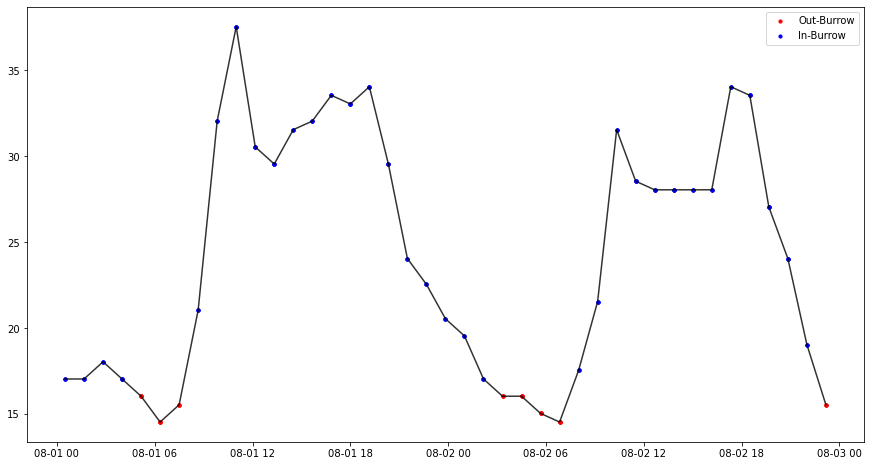

In [75]:
hector = burrow_df[burrow_df['Snake_Name']=='Albert'] #HectorAlbert
hector = hector.loc[(hector['Date'] >= '2022-08-01') & (hector['Date'] <= '2022-08-03')]

plt.figure(figsize=(15, 8))
plt.plot(hector['Date'],hector['Temperature'],color='k', alpha=0.8)
plt.scatter(hector[hector['kmean_clusters']==0]['Date'], hector[hector['kmean_clusters']==0]['Temperature'], s=10, color='r', label='Out-Burrow')
plt.scatter(hector[hector['kmean_clusters']==1]['Date'], hector[hector['kmean_clusters']==1]['Temperature'], s=10, color='b', label='In-Burrow')
plt.legend()
plt.show()

In [87]:
# #TS clustering
# import numpy as np
# import matplotlib.pyplot as plt
# from tslearn.clustering import TimeSeriesKMeans
# from tslearn.datasets import CachedDatasets
# from tslearn.preprocessing import TimeSeriesScalerMeanVariance


# # Assume df is your DataFrame with a column 'time_series'
# # Extract the time series data and convert to numpy array
# time_series_data = texas['Temperature'].values

# # Reshape the array if necessary (tslearn expects 3D data)
# # The shape should be (number_of_samples, length_of_time_series, 1)
# time_series_data = time_series_data.reshape(-1, len(time_series_data), 1)

# # Initialize and fit the scaler
# scaler = TimeSeriesScalerMeanVariance()
# scaled_time_series = scaler.fit_transform(time_series_data)
# #X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# # Number of clusters (K)
# n_clusters = 2

# # Perform K-means clustering with DTW distance
# kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
# y_pred = kmeans.fit_predict(scaled_time_series)